# Name of the Task : Exploratory Data Analysis- Global Terrorism
# Task Category : Data Science & Business Analytics
# Performed by : Sreekanth N, Ph.D.
# Organization : The Sparks Foundation

# Steps Involved

# Version Verification of Libraries

In [1]:
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
import seaborn
# Seaborn 
print ('seaborn: {}'.format(seaborn.__version__))

numpy: 1.19.2
matplotlib: 3.3.2
pandas: 1.1.3
sklearn: 0.23.2
seaborn: 0.11.0


# Importing Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import os 
import mpl_toolkits
import json

print ("libraries imported succcessfully")

libraries imported succcessfully


# Reading of Dataset

In [30]:
df_terrorism= pd.read_csv(r"C:\Users\Biofact\Desktop\data\globalterrorismdb_0718dist.csv",encoding='ISO-8859-1')
print("Data Read Successfully")

Data Read Successfully


# Dimensions of the Dataset

In [31]:
df_terrorism.shape

(181691, 135)

# Cleaning or Pre-Processing of data

# Selection of Required Columns

In [5]:
# Wanted columns
usecols = [1, 5, 8, 10, 11, 12, 13, 14, 25, 26, 27, 29, 35, 58, 69, 71, 82, 98, 100, 101, 103, 104, 106]
renamecols = {
    'latitude': 'lat',
    'longitude': 'lon',
    'iyear': u'year',
    'country_txt': u'country',
    'region_txt': u'region',
    'provstate': u'state',
    'attacktype1_txt': u'attacktype',
    'targtype1_txt': u'targettype',
    'weaptype1_txt': u'weapontype',
    'nperps': u'nter',
    'nkill': u'nkilled',
    'nkillter': u'nkilledter',
    'nwound': u'nwounded',
    'nwoundte': u'nwoundedter',
    'propextent_txt': u'propertyextent'
}

# Reading Dataset

In [6]:
df_terrorism= pd.read_csv(r"C:\Users\Biofact\Desktop\data\globalterrorismdb_0718dist.csv",encoding='ISO-8859-1',usecols=usecols)
df_terrorism.rename(columns=renamecols, inplace=True)
df_terrorism = df_terrorism.apply(lambda x: x.encode('utf-8').strip() if isinstance(x, str) else x)
print("Data Read Succcessfully")

Data Read Succcessfully


# Dimensions of the Dataset

In [9]:
df_terrorism.shape

(181691, 23)

# Remove unknown values in coordinates

In [10]:
df_terrorism = df_terrorism[pd.notnull(df_terrorism.lat)]
df_terrorism = df_terrorism[pd.notnull(df_terrorism.lon)]
print("Unknown values in the coordinates are removed succcessfully")

Unknown values in the coordinates are removed succcessfully


# Unknowns in numeric columns

In [11]:
exclude_cols = ['year', 'lat', 'lon']
float_cols = [c for c in df_terrorism.select_dtypes(include=[float]).columns.tolist() if c not in exclude_cols]

# Convert the unknowns into negative numbers, say -9

In [12]:
df_terrorism[float_cols] = df_terrorism[float_cols].fillna(0).astype(int)
df_terrorism[float_cols] = df_terrorism[float_cols].mask(df_terrorism[float_cols] < 0, 0)

# Unknowns in string columns

In [13]:
str_cols = df_terrorism.select_dtypes(exclude=[float]).columns.tolist()
df_terrorism[str_cols] = df_terrorism[str_cols].fillna('Unknown')
# Many fields are dots which mean unknown value
df_terrorism[str_cols] = df_terrorism[str_cols].replace(r'^\.*$', 'Unknown', regex=True)

# Limit long strings

In [14]:
df_terrorism['weapontype'] = df_terrorism['weapontype'].replace(u'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)', 'Vehicle')
df_terrorism['propertyextent'] = df_terrorism['propertyextent'].replace(u'Minor (likely < $1 million)', u'Minor (< $1 million)')
df_terrorism['propertyextent'] = df_terrorism['propertyextent'].replace(u'Major (likely > $1 million but < $1 billion)', u'Major (< $1 billion)')
df_terrorism['propertyextent'] = df_terrorism['propertyextent'].replace(u'Catastrophic (likely > $1 billion)', u'Catastrophic (> $1 billion)')

# Number of Duplicate Values in the dataset

In [15]:
df_terrorism.duplicated().sum()

22037

# Removal of Duplicate Values 

In [16]:
df_terrorism.drop_duplicates(keep=False,inplace=True)

# Null values in the dataset

In [17]:
df_terrorism.isnull().sum()

year              0
extended          0
country           0
region            0
state             0
city              0
lat               0
lon               0
multiple          0
success           0
suicide           0
attacktype        0
targettype        0
gname             0
nter              0
claimed           0
weapontype        0
nkilled           0
nkilledter        0
nwounded          0
nwoundedter       0
property          0
propertyextent    0
dtype: int64

# Total number of Null Values

In [18]:
print("total number of null values = ",df_terrorism.isnull().sum().sum())

total number of null values =  0


# Shape of Processed dataset

In [19]:
df_terrorism

,year,extended,country,region,state,city,lat,lon,multiple,success,...,gname,nter,claimed,weapontype,nkilled,nkilledter,nwounded,nwoundedter,property,propertyextent
0,1970,0,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,18.456792,-69.951164,0,1,...,MANO-D,0,0,Unknown,1,0,0,0,0,Unknown
1,1970,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,0,1,...,23rd of September Communist League,7,0,Unknown,0,0,0,0,0,Unknown
2,1970,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,0,1,...,Unknown,0,0,Unknown,1,0,0,0,0,Unknown
3,1970,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,0,1,...,Unknown,0,0,Explosives,0,0,0,0,1,Unknown
4,1970,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,0,1,...,Unknown,0,0,Incendiary,0,0,0,0,1,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,0,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,0,1,...,Al-Shabaab,0,1,Firearms,1,0,2,0,-9,Unknown
181687,2017,0,Syria,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,0,1,...,Muslim extremists,0,0,Explosives,2,0,7,0,1,Unknown
181688,2017,0,Philippines,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,0,1,...,Bangsamoro Islamic Freedom Movement (BIFM),0,0,Incendiary,0,0,0,0,1,Unknown
181689,2017,0,India,South Asia,Manipur,Imphal,24.798346,93.940430,0,0,...,Unknown,0,0,Explosives,0,0,0,0,-9,Unknown


# Dimensions of the Dataset

In [20]:
df_terrorism.shape

(145751, 23)

# Exploratory Data Analysis

# Columns in the Dataset

In [160]:
df_terrorism.columns

Index(['year', 'extended', 'country', 'region', 'state', 'city', 'lat', 'lon',
       'multiple', 'success', 'suicide', 'attacktype', 'targettype', 'gname',
       'nter', 'claimed', 'weapontype', 'nkilled', 'nkilledter', 'nwounded',
       'nwoundedter', 'property', 'propertyextent'],
      dtype='object')

# Datatypes in the Dataset

In [161]:
df_terrorism.dtypes

year                int64
extended            int64
country            object
region             object
state              object
city               object
lat               float64
lon               float64
multiple            int32
success             int64
suicide             int64
attacktype         object
targettype         object
gname              object
nter                int32
claimed             int32
weapontype         object
nkilled             int32
nkilledter          int32
nwounded            int32
nwoundedter         int32
property            int64
propertyextent     object
dtype: object

# Peek at the data

In [162]:
df_terrorism.head()

,year,extended,country,region,state,city,lat,lon,multiple,success,...,gname,nter,claimed,weapontype,nkilled,nkilledter,nwounded,nwoundedter,property,propertyextent
0,1970,0,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,18.456792,-69.951164,0,1,...,MANO-D,0,0,Unknown,1,0,0,0,0,Unknown
1,1970,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,0,1,...,23rd of September Communist League,7,0,Unknown,0,0,0,0,0,Unknown
2,1970,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,0,1,...,Unknown,0,0,Unknown,1,0,0,0,0,Unknown
3,1970,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,0,1,...,Unknown,0,0,Explosives,0,0,0,0,1,Unknown
4,1970,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,0,1,...,Unknown,0,0,Incendiary,0,0,0,0,1,Unknown


In [163]:
df_terrorism.tail()

,year,extended,country,region,state,city,lat,lon,multiple,success,...,gname,nter,claimed,weapontype,nkilled,nkilledter,nwounded,nwoundedter,property,propertyextent
181686,2017,0,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,0,1,...,Al-Shabaab,0,1,Firearms,1,0,2,0,-9,Unknown
181687,2017,0,Syria,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,0,1,...,Muslim extremists,0,0,Explosives,2,0,7,0,1,Unknown
181688,2017,0,Philippines,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,0,1,...,Bangsamoro Islamic Freedom Movement (BIFM),0,0,Incendiary,0,0,0,0,1,Unknown
181689,2017,0,India,South Asia,Manipur,Imphal,24.798346,93.940430,0,0,...,Unknown,0,0,Explosives,0,0,0,0,-9,Unknown
181690,2017,0,Philippines,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,0,0,...,Unknown,0,0,Explosives,0,0,0,0,0,Unknown


# Full Summary of Dataset

In [21]:
df_terrorism.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145751 entries, 0 to 181690
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            145751 non-null  int64  
 1   extended        145751 non-null  int64  
 2   country         145751 non-null  object 
 3   region          145751 non-null  object 
 4   state           145751 non-null  object 
 5   city            145751 non-null  object 
 6   lat             145751 non-null  float64
 7   lon             145751 non-null  float64
 8   multiple        145751 non-null  int32  
 9   success         145751 non-null  int64  
 10  suicide         145751 non-null  int64  
 11  attacktype      145751 non-null  object 
 12  targettype      145751 non-null  object 
 13  gname           145751 non-null  object 
 14  nter            145751 non-null  int32  
 15  claimed         145751 non-null  int32  
 16  weapontype      145751 non-null  object 
 17  nkilled   

# Count of Values in each column of Dataset

In [104]:
df_terrorism.nunique()

year                 47
extended              2
country             204
region               12
state              2832
city              35059
lat               48321
lon               48039
multiple              2
success               2
suicide               2
attacktype            9
targettype           22
gname              3463
nter                108
claimed               2
weapontype           12
nkilled             201
nkilledter           96
nwounded            237
nwoundedter          44
property              3
propertyextent        4
dtype: int64

# Years in the Dataset

In [102]:
df_terrorism["year"].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017], dtype=int64)

# Count of each year in the dataset

In [103]:
df_terrorism["year"].value_counts()

2014    16794
2015    14861
2016    13530
2013    11926
2017    10853
2012     8470
2011     5048
1992     4832
2010     4818
2008     4756
2009     4706
1991     4405
1989     4147
1990     3648
1988     3471
1994     3295
1984     3198
2007     3190
1997     2996
1987     2989
1995     2920
1996     2909
2006     2716
1985     2680
1986     2680
1983     2670
1980     2561
1979     2533
1981     2469
1982     2408
2005     1985
2001     1883
2000     1772
1978     1455
1999     1341
2002     1310
1977     1292
2003     1263
2004     1137
1976      900
1998      891
1975      727
1970      643
1974      577
1972      551
1973      465
1971      463
Name: year, dtype: int64

# Total count of region in the Dataset

In [164]:
df_terrorism['region'].value_counts()

South Asia                     39932
Middle East & North Africa     39116
Sub-Saharan Africa             15315
South America                  12720
Western Europe                 12098
Southeast Asia                 10957
Central America & Caribbean     6822
Eastern Europe                  4579
North America                   2832
East Asia                        627
Central Asia                     496
Australasia & Oceania            257
Name: region, dtype: int64

# Total count of gname in the Dataset

In [165]:
df_terrorism['gname'].value_counts()

Unknown                                        65768
Taliban                                         7130
Islamic State of Iraq and the Levant (ISIL)     4636
Al-Shabaab                                      2852
Shining Path (SL)                               2677
                                               ...  
El-Feth katibat                                    1
Hanchongryun                                       1
Iranian Militants                                  1
Armenian Red Army                                  1
Terai Janatantrik Madhes Party                     1
Name: gname, Length: 3397, dtype: int64

# Total Counts of Cities in the Dataset

In [166]:
df_terrorism['city'].value_counts()

Unknown        6088
Baghdad        3967
Karachi        1491
Mosul          1433
Mogadishu      1211
               ... 
Porongo           1
Usor              1
Masele            1
Malagan           1
Kottampatty       1
Name: city, Length: 34797, dtype: int64

# Total counts of Attack type in the Dataset

In [167]:
df_terrorism['attacktype'].value_counts()

Bombing/Explosion                      66473
Armed Assault                          36659
Assassination                          16286
Hostage Taking (Kidnapping)             9953
Facility/Infrastructure Attack          7811
Unknown                                 6281
Unarmed Assault                          844
Hostage Taking (Barricade Incident)      838
Hijacking                                606
Name: attacktype, dtype: int64

# Total Counts of Target type in the Dataset

In [168]:
df_terrorism['targettype'].value_counts()

Private Citizens & Property       34444
Military                          24366
Police                            21508
Government (General)              17355
Business                          14350
Transportation                     5270
Unknown                            4087
Religious Figures/Institutions     3863
Educational Institution            3479
Government (Diplomatic)            3084
Utilities                          2828
Terrorists/Non-State Militia       2771
Journalists & Media                2517
Violent Political Party            1644
Airports & Aircraft                1207
NGO                                 906
Telecommunication                   804
Tourists                            395
Maritime                            284
Food or Water Supply                264
Abortion Related                    203
Other                               122
Name: targettype, dtype: int64

# Stastical Summary of Data

In [170]:
df_terrorism.describe()

,year,extended,lat,lon,multiple,success,suicide,nter,claimed,nkilled,nkilledter,nwounded,nwoundedter,property
count,145751.000000,145751.000000,145751.000000,1.457510e+05,145751.000000,145751.000000,145751.000000,145751.000000,145751.000000,145751.000000,145751.000000,145751.000000,145751.000000,145751.000000
mean,2003.696846,0.050717,23.737317,-5.594836e+02,0.087306,0.885668,0.043828,3.487187,0.118277,2.596339,0.386097,3.336485,0.080638,-0.595577
std,12.881297,0.219419,17.816167,2.257515e+05,0.282285,0.318215,0.204713,95.413777,0.322937,12.242903,3.708930,38.221146,1.304178,3.144615
min,1970.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000
25%,1992.000000,0.000000,11.500433,9.109324e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2010.000000,0.000000,31.326015,4.378420e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2014.000000,0.000000,34.621521,6.988188e+01,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,1.000000
max,2017.000000,1.000000,74.633553,1.793667e+02,1.000000,1.000000,1.000000,25000.000000,1.000000,1570.000000,500.000000,8191.000000,200.000000,1.000000


# Data in Each Column

In [171]:
for col in df_terrorism:
    print(df_terrorism[col].unique())

[1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1986 1982
 1983 1984 1985 1987 1988 1989 1990 1991 1992 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017]
[0 1]
['Dominican Republic' 'Mexico' 'Philippines' 'Greece' 'Japan' 'Uruguay'
 'United States' 'Italy' 'East Germany (GDR)' 'Guatemala' 'Venezuela'
 'West Germany (FRG)' 'Switzerland' 'Jordan' 'Brazil' 'Egypt' 'Argentina'
 'Lebanon' 'Ireland' 'Turkey' 'Paraguay' 'Iran' 'United Kingdom'
 'Colombia' 'Nicaragua' 'Spain' 'Netherlands' 'Belgium' 'Canada'
 'Australia' 'Pakistan' 'Ethiopia' 'Sweden' 'Costa Rica' 'Bolivia'
 'South Yemen' 'Cambodia' 'Israel' 'Poland' 'Taiwan' 'Panama'
 'West Bank and Gaza Strip' 'Austria' 'India' 'France' 'South Vietnam'
 "People's Republic of the Congo" 'Portugal' 'Algeria' 'El Salvador'
 'Thailand' 'Haiti' 'Sudan' 'Morocco' 'Cyprus' 'Afghanistan' 'Chile'
 'Honduras' 'Yugoslavia' 'Ecuador' 'New Zealand' 'Zambia' 'Zaire'
 'Ma

# Correlation among the columns

In [173]:
df_terrorism.corr()

,year,extended,lat,lon,multiple,success,suicide,nter,claimed,nkilled,nkilledter,nwounded,nwoundedter,property
year,1.000000,0.085612,0.136563,0.004544,0.192339,-0.055631,0.137294,-0.007671,0.243189,0.014110,0.073636,0.010954,0.048672,-0.246113
extended,0.085612,1.000000,-0.031840,0.000612,0.003282,0.079313,-0.041849,0.007095,0.043446,0.011508,0.009080,-0.011784,0.003906,0.001298
lat,0.136563,-0.031840,1.000000,0.001682,0.016141,-0.060114,0.074880,-0.014746,0.082393,-0.018872,0.013885,0.015433,0.024218,-0.065646
lon,0.004544,0.000612,0.001682,1.000000,0.000830,-0.000949,0.000575,0.000096,0.000987,-0.000516,0.000280,0.000232,0.000170,-0.001365
multiple,0.192339,0.003282,0.016141,0.000830,1.000000,0.012211,0.063198,0.005011,0.153533,0.028861,0.033395,0.025729,0.017498,-0.079327
success,-0.055631,0.079313,-0.060114,-0.000949,0.012211,1.000000,-0.028716,0.007494,0.030042,0.052950,-0.021452,0.024677,-0.014305,-0.037654
suicide,0.137294,-0.041849,0.074880,0.000575,0.063198,-0.028716,1.000000,-0.001857,0.176893,0.133679,0.100644,0.094466,0.004983,-0.074377
nter,-0.007671,0.007095,-0.014746,0.000096,0.005011,0.007494,-0.001857,1.000000,0.003209,0.021924,0.023334,0.010891,0.013930,0.004812
claimed,0.243189,0.043446,0.082393,0.000987,0.153533,0.030042,0.176893,0.003209,1.000000,0.063533,0.077332,0.035727,0.058204,-0.076182
nkilled,0.014110,0.011508,-0.018872,-0.000516,0.028861,0.052950,0.133679,0.021924,0.063533,1.000000,0.351417,0.449827,0.110684,-0.014859


# Covariance between set of variables

In [174]:
df_terrorism.cov()

,year,extended,lat,lon,multiple,success,suicide,nter,claimed,nkilled,nkilledter,nwounded,nwoundedter,property
year,165.927809,0.241975,31.340539,1.321251e+04,0.699380,-0.228033,0.362041,-9.427709,1.011630,2.225141,3.518001,5.393143,0.817667,-9.969225
extended,0.241975,0.048145,-0.124470,3.029411e+01,0.000203,0.005538,-0.001880,0.148533,0.003079,0.030915,0.007389,-0.098822,0.001118,0.000895
lat,31.340539,-0.124470,317.415823,6.766963e+03,0.081175,-0.340808,0.273103,-25.067462,0.474048,-4.116284,0.917487,10.509426,0.562711,-3.677794
lon,13212.510485,30.294111,6766.962958,5.096373e+10,52.893273,-68.185725,26.594830,2064.466116,71.991464,-1426.390090,234.255259,2002.901375,49.962750,-969.307305
multiple,0.699380,0.000203,0.081175,5.289327e+01,0.079685,0.001097,0.003652,0.134961,0.013996,0.099743,0.034963,0.277600,0.006442,-0.070417
success,-0.228033,0.005538,-0.340808,-6.818572e+01,0.001097,0.101261,-0.001871,0.227537,0.003087,0.206287,-0.025318,0.300138,-0.005937,-0.037679
suicide,0.362041,-0.001880,0.273103,2.659483e+01,0.003652,-0.001871,0.041908,-0.036275,0.011694,0.335037,0.076416,0.739139,0.001330,-0.047880
nter,-9.427709,0.148533,-25.067462,2.064466e+03,0.134961,0.227537,-0.036275,9103.788774,0.098877,25.610066,8.257386,39.716102,1.733393,1.443751
claimed,1.011630,0.003079,0.474048,7.199146e+01,0.013996,0.003087,0.011694,0.098877,0.104288,0.251188,0.092625,0.440977,0.024514,-0.077364
nkilled,2.225141,0.030915,-4.116284,-1.426390e+03,0.099743,0.206287,0.335037,25.610066,0.251188,149.888679,15.957164,210.491106,1.767281,-0.572063


# Slicing of Data

In [175]:
df_terrorism.iloc[0]

year                                     1970
extended                                    0
country                    Dominican Republic
region            Central America & Caribbean
state                                 Unknown
city                            Santo Domingo
lat                                   18.4568
lon                                  -69.9512
multiple                                    0
success                                     1
suicide                                     0
attacktype                      Assassination
targettype        Private Citizens & Property
gname                                  MANO-D
nter                                        0
claimed                                     0
weapontype                            Unknown
nkilled                                     1
nkilledter                                  0
nwounded                                    0
nwoundedter                                 0
property                          

In [177]:
df_terrorism.iloc[:,0] 

0         1970
1         1970
2         1970
3         1970
4         1970
          ... 
181686    2017
181687    2017
181688    2017
181689    2017
181690    2017
Name: year, Length: 145751, dtype: int64

# Visualization of Data

# Heat map of Correlation among the columns

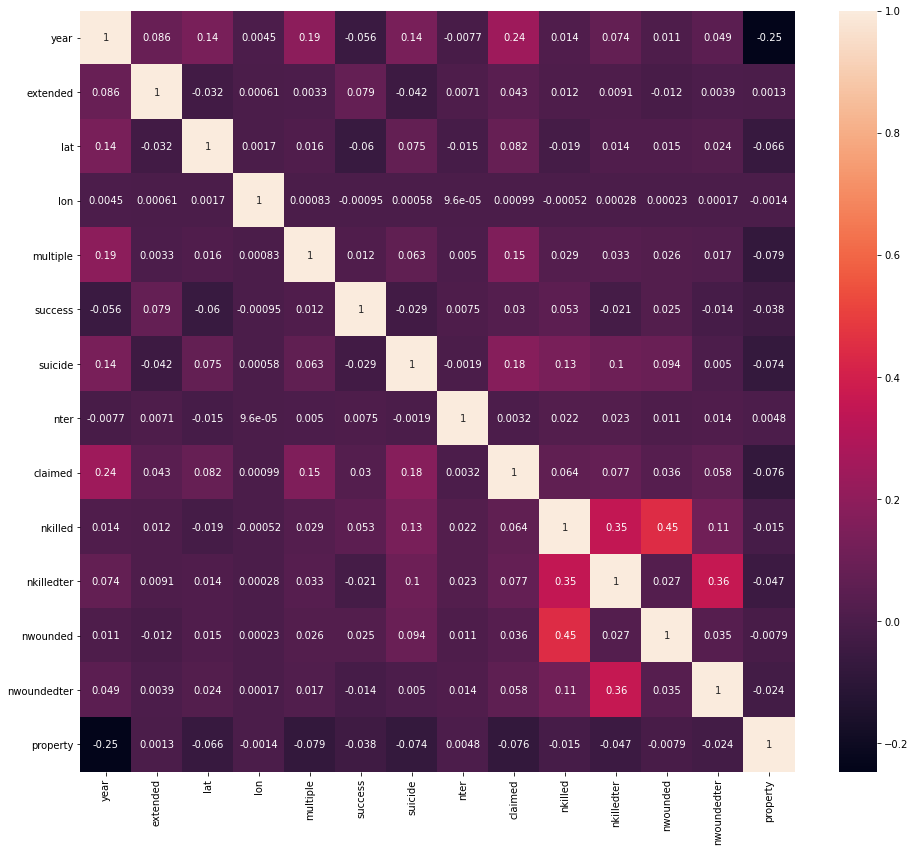

In [183]:
fig,axes = plt.subplots(1,1,figsize=(16,14))
sns.heatmap(df_terrorism.corr(), annot= True)
plt.show()

# Heat map of Covariance among the set of varibles

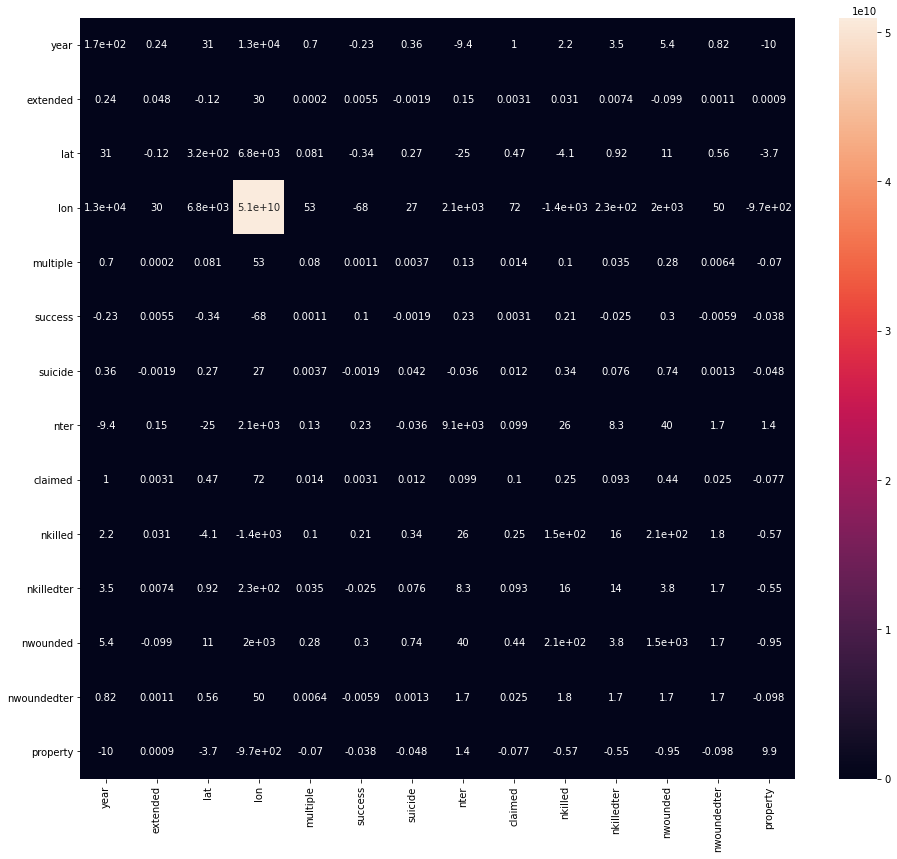

In [182]:
fig,axes = plt.subplots(1,1,figsize=(16,14))
sns.heatmap(df_terrorism.cov(), annot= True)
plt.show()

# Visualization of Missing Values

<AxesSubplot:>

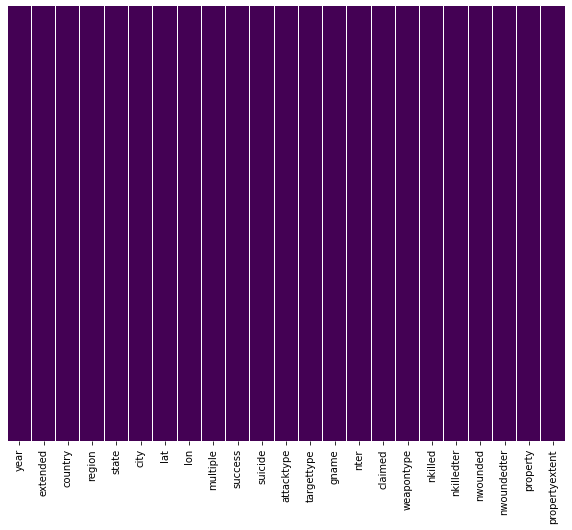

In [184]:
sns.heatmap(df_terrorism.isnull(),yticklabels=False,cbar=False,cmap="viridis") 

# Pie Plot of Attacktypes

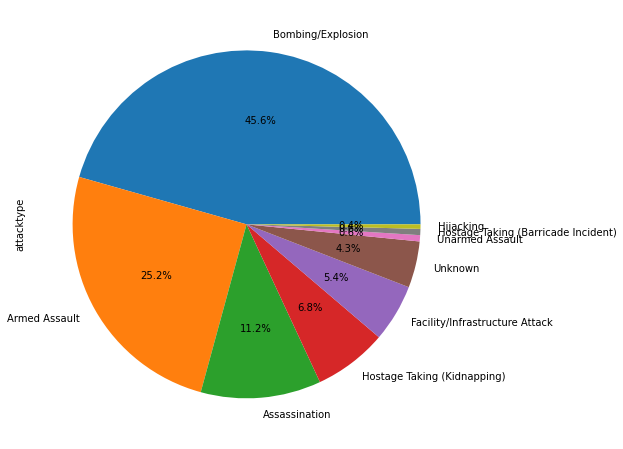

In [195]:
# plt.figure(figsize=(12,10))
df_terrorism['attacktype'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

# Pie Plot of Targettype

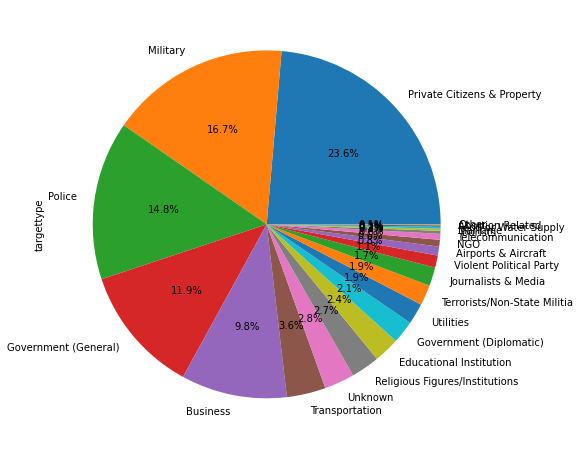

In [194]:
# plt.figure(figsize=(12,10))
df_terrorism['targettype'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

# Pie Plot of Weapon type

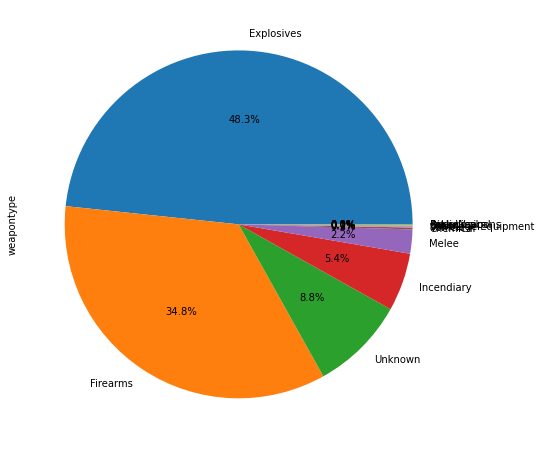

In [196]:
# plt.figure(figsize=(12,10))
df_terrorism['weapontype'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

# Pie Plot of Region

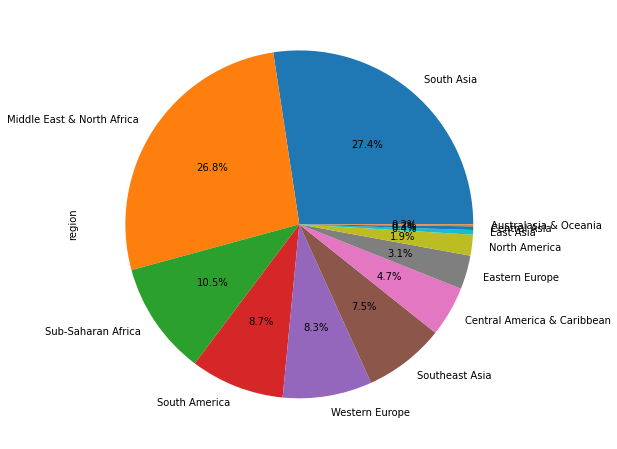

In [197]:
# plt.figure(figsize=(12,10))
df_terrorism['region'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

# Number of terrorist activities by region

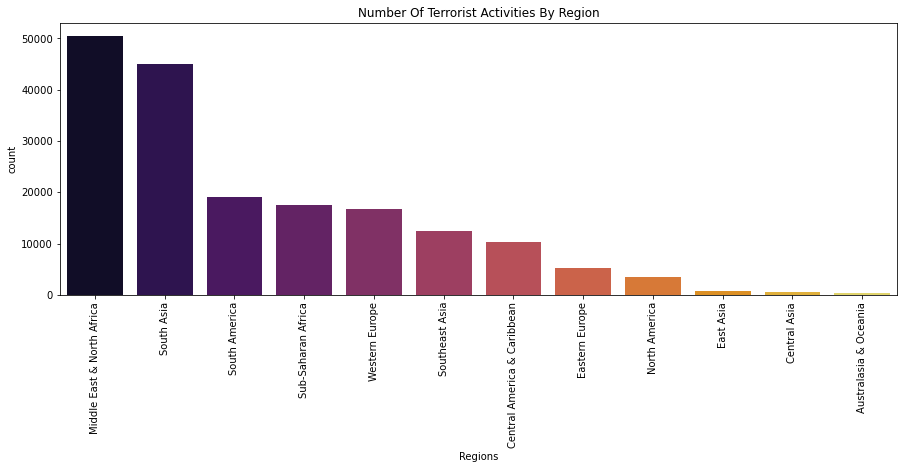

In [99]:
plt.subplots(figsize=(15,5))
sns.countplot('region',data=df_terrorism,palette='inferno',order=df_terrorism['region'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Regions')
plt.title('Number Of Terrorist Activities By Region')
plt.show()

# Number Of Terrorist Activities Each Year

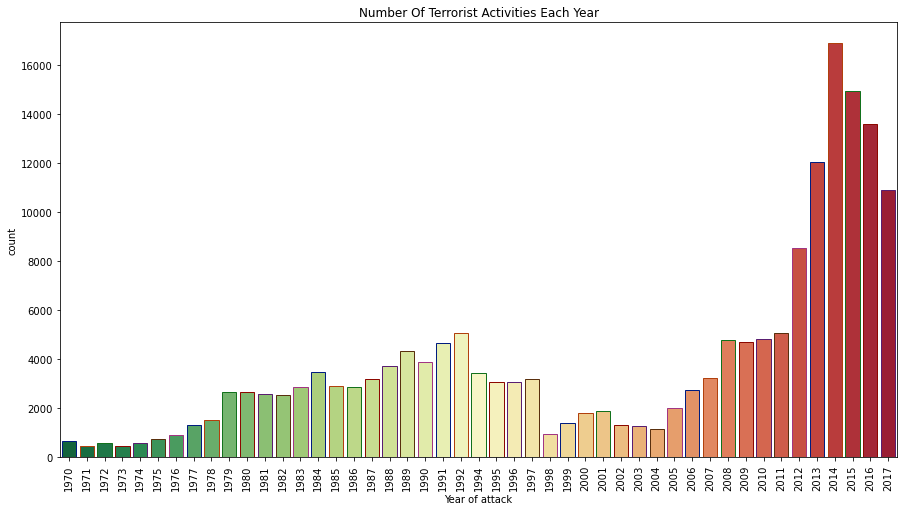

In [100]:
plt.subplots(figsize=(15,8))
sns.countplot('year',data=df_terrorism,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.xlabel('Year of attack')
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

# Frequency of Attacks

Text(0, 0.5, 'Frequency of Attacks')

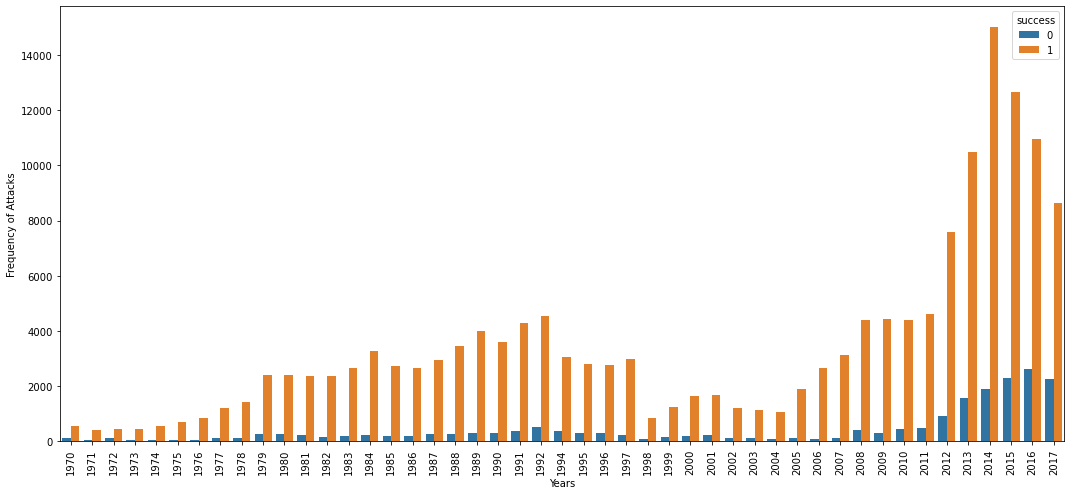

In [29]:
plt.figure(figsize=(18,8))
sns.countplot(x=df_terrorism["year"], hue="success", data = df_terrorism)
plt.xlabel("Years")
plt.xticks(rotation=90)
plt.ylabel("Frequency of Attacks")

# Attacking types of terrorists

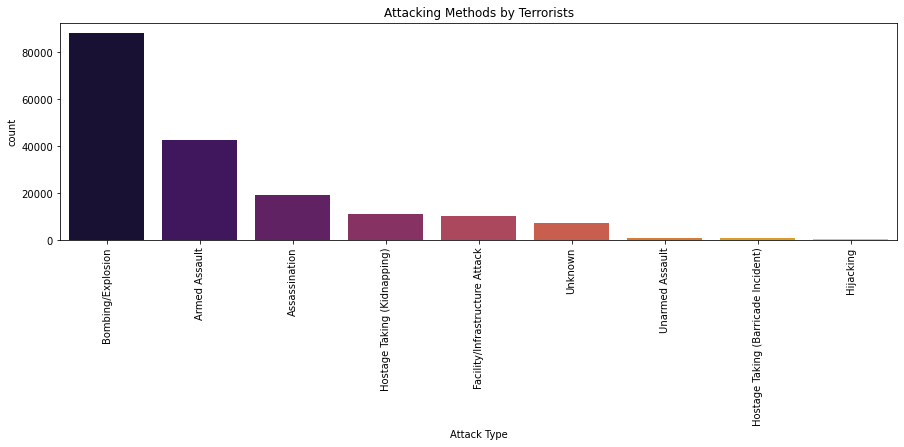

In [101]:
plt.subplots(figsize=(15,4))
sns.countplot('attacktype',data=df_terrorism,palette='inferno',order=df_terrorism['attacktype'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Attack Type')
plt.title('Attacking Methods by Terrorists')
plt.show()

# Weapons used 

Text(0.5, 1.0, 'Types of Weapons')

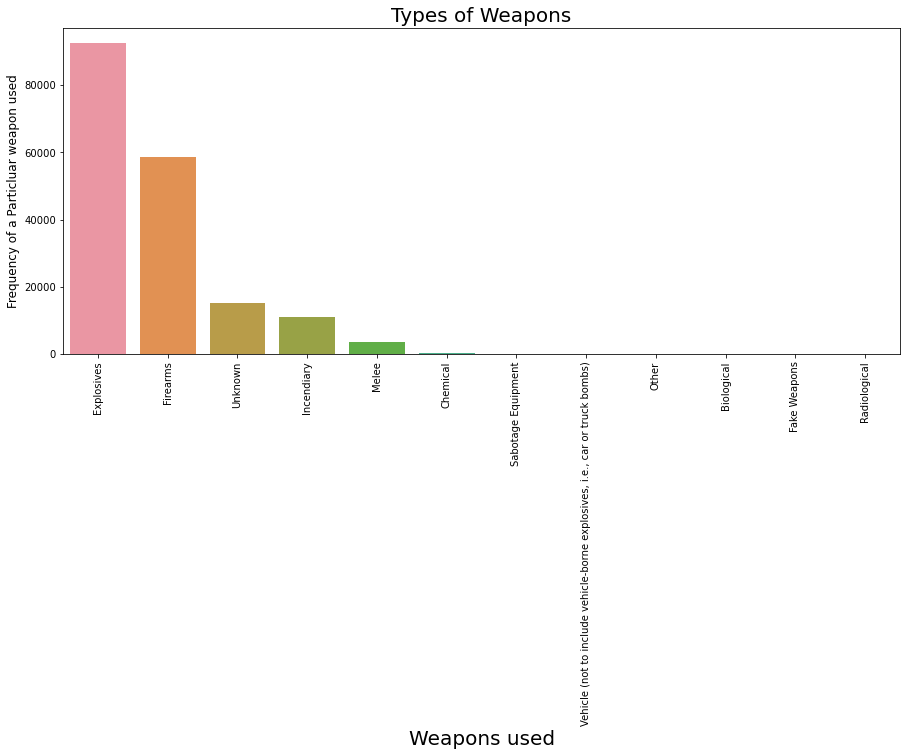

In [23]:
plt.figure(figsize=(15,6))
sns.barplot(x= df_terrorism["weapontype"].value_counts()[:50].index,y = df_terrorism["weapontype"].value_counts()[:50].values)
plt.xlabel("Weapons used", fontsize=20)
plt.xticks(rotation=90)
plt.ylabel("Frequency of a Particluar weapon used", fontsize=12)
plt.title("Types of Weapons", fontsize=20)

# Attacking methods by terrorists 

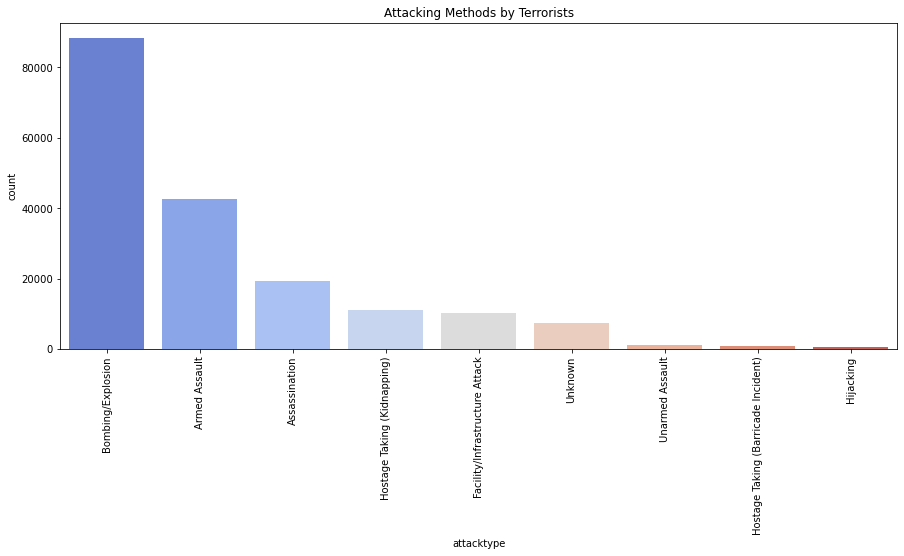

In [25]:
plt.subplots(figsize=(15,6))
sns.countplot(x= 'attacktype', data=df_terrorism, palette='coolwarm',order=df_terrorism['attacktype'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

# Target types

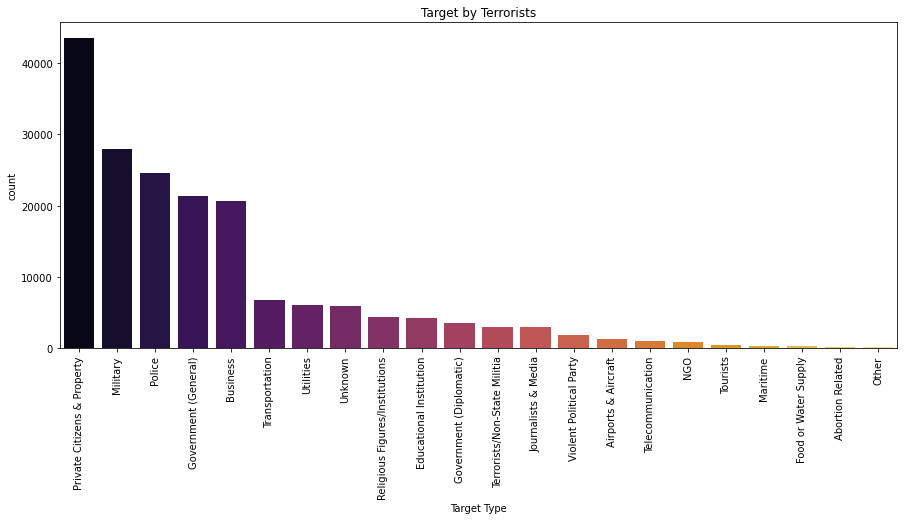

In [22]:
plt.subplots(figsize=(15,6))
sns.countplot('targettype',data=df_terrorism,palette='inferno',order=df_terrorism['targettype'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Target Type')
plt.title('Target by Terrorists')
plt.show()

# Number of terrorist activities countrywise

Text(0.5, 1.0, 'Number of Terrorist Activities Countrywise')

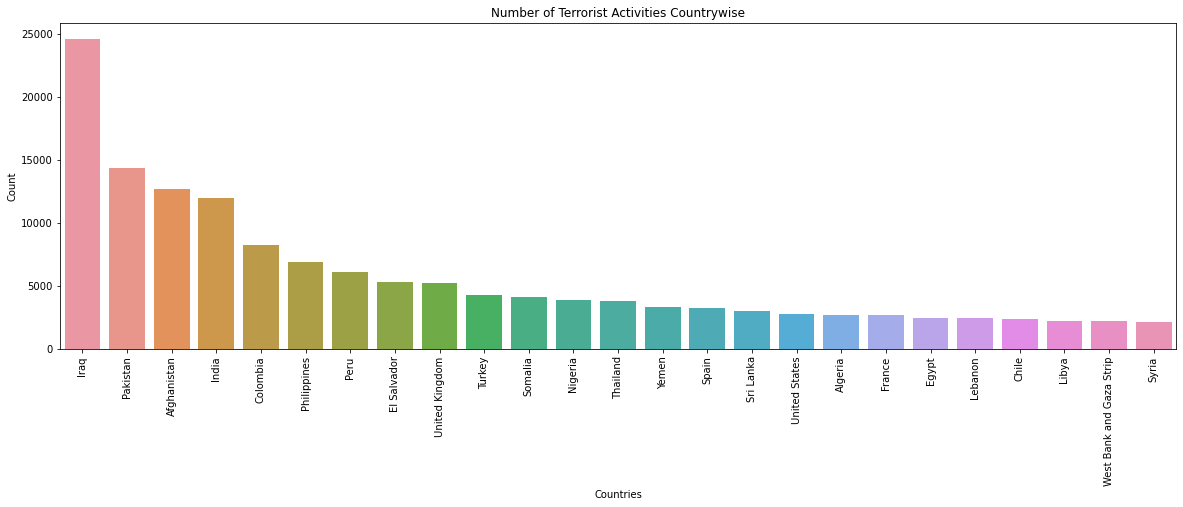

In [21]:
plt.figure(figsize=(20,6))
sns.barplot(x=df_terrorism['country'].value_counts()[:25].index, y=df_terrorism['country'].value_counts()[:25])
plt.xlabel("Countries")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [10,8]
plt.title("Number of Terrorist Activities Countrywise")

# Number of terrorist activities regionwise

Text(0.5, 1.0, 'Number of Terrorist Activities Regionwise')

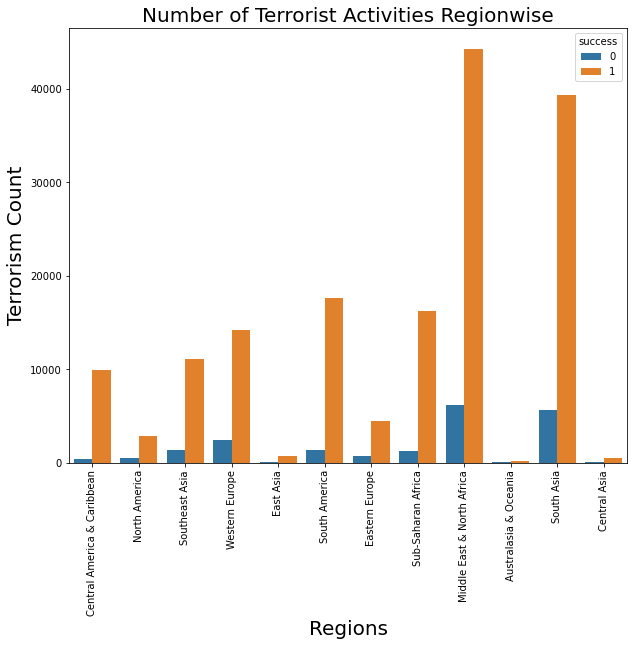

In [37]:
sns.countplot(x= df_terrorism["region"], hue="success", data=df_terrorism)
plt.xlabel("Regions", fontsize=20)
plt.xticks(rotation=90)
plt.ylabel("Terrorism Count", fontsize=20)
plt.title("Number of Terrorist Activities Regionwise", fontsize=20)

# Terrorist Attacks Year Vs Region

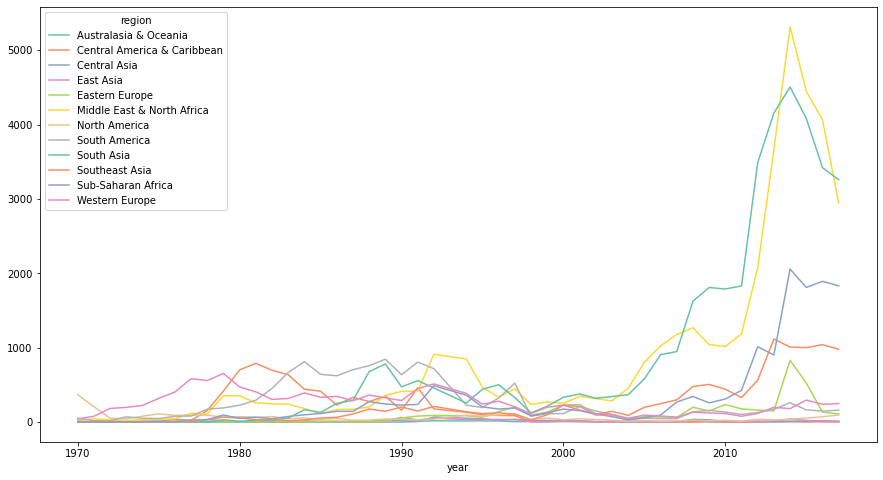

In [200]:
df_region=pd.crosstab(df_terrorism.year,df_terrorism.region)
df_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

# Target type Vs Year

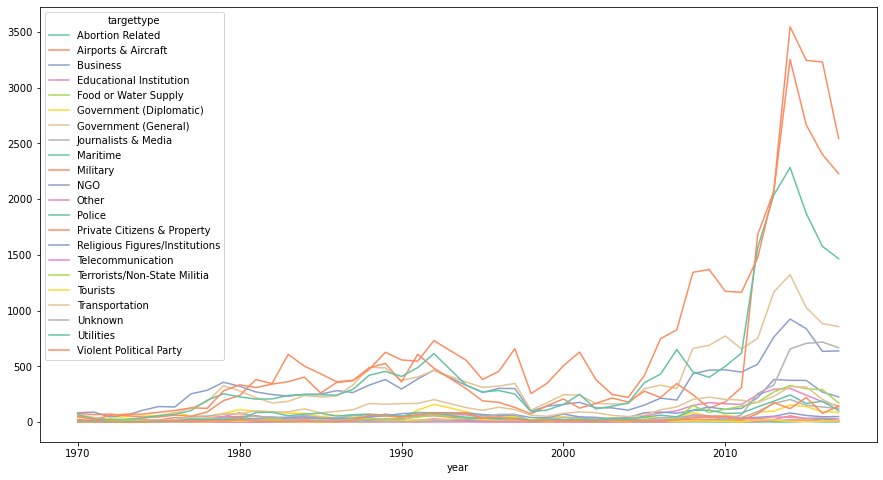

In [199]:
df_region=pd.crosstab(df_terrorism.year,df_terrorism.targettype)
df_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

# Wounded Vs Year

Text(0, 0.5, 'Wounded')

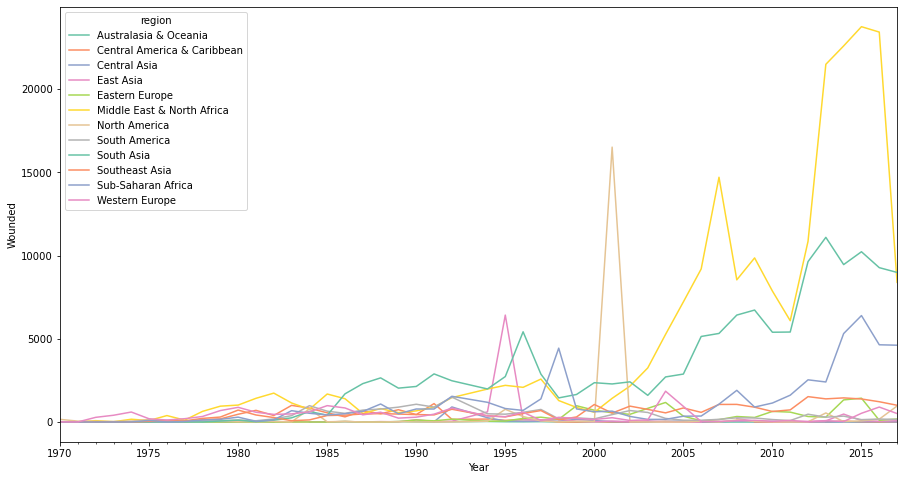

In [119]:
d=df_terrorism.groupby(['year','region'])['nwounded'].sum()
plot_df_terrorism = d.unstack('region').loc[:]
plot_df_terrorism.index = pd.PeriodIndex(plot_df_terrorism.index.tolist(),freq='A')
plot_df_terrorism.plot(figsize=(15,8),color=sns.color_palette('Set2',12))
plt.xlabel("Year")
plt.ylabel("Wounded")

# Histogram of data

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'extended'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'lon'}>],
       [<AxesSubplot:title={'center':'multiple'}>,
        <AxesSubplot:title={'center':'success'}>,
        <AxesSubplot:title={'center':'suicide'}>,
        <AxesSubplot:title={'center':'nter'}>],
       [<AxesSubplot:title={'center':'claimed'}>,
        <AxesSubplot:title={'center':'nkilled'}>,
        <AxesSubplot:title={'center':'nkilledter'}>,
        <AxesSubplot:title={'center':'nwounded'}>],
       [<AxesSubplot:title={'center':'nwoundedter'}>,
        <AxesSubplot:title={'center':'property'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

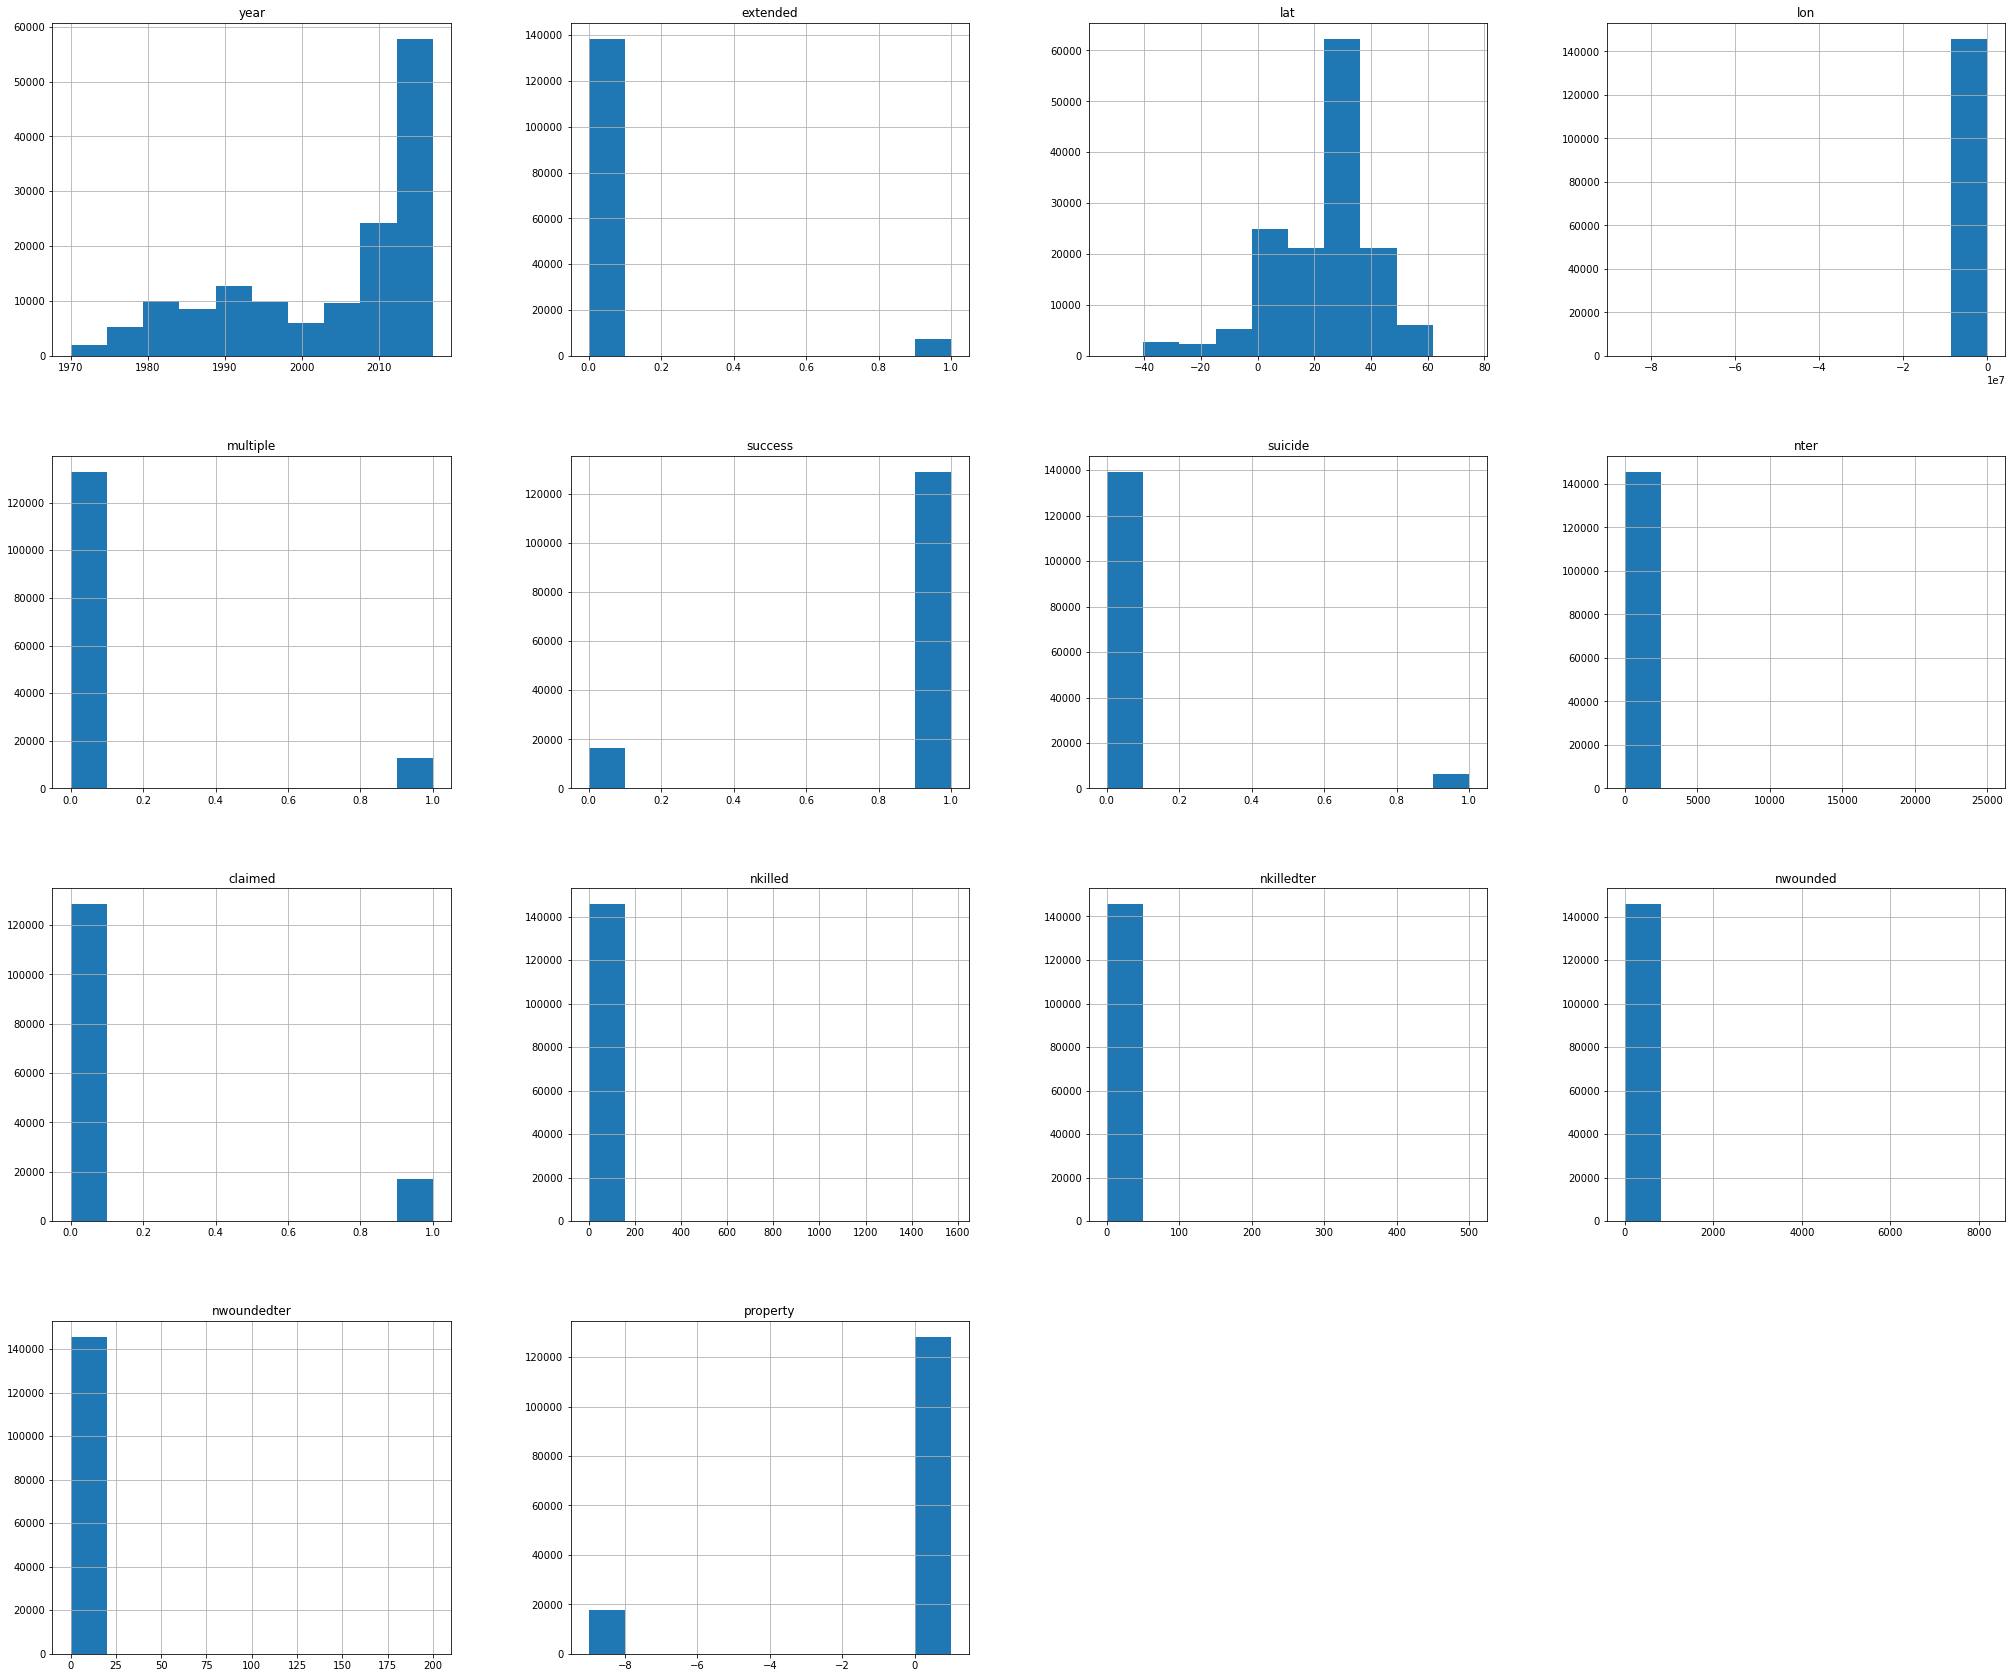

In [205]:
df_terrorism.hist(figsize=(35,30))

# Attacks Vs Killed

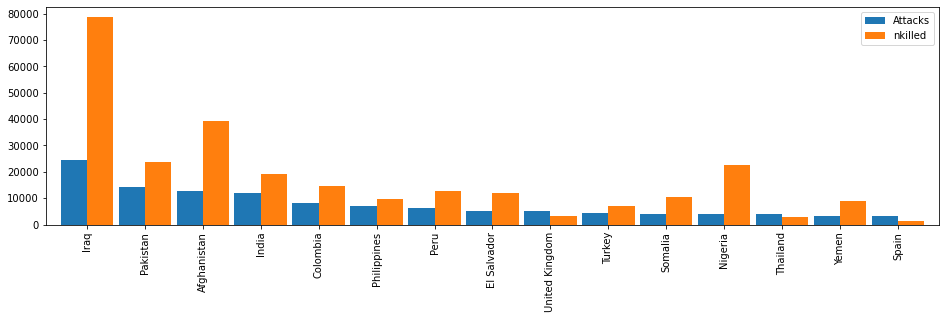

In [19]:
count_terror = df_terrorism['country'].value_counts()[:15].to_frame()
count_terror.columns=['Attacks']
count_kill=df_terrorism.groupby ('country')['nkilled'].sum().to_frame()
count_terror.merge(count_kill,left_index = True,right_index =True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(16,4)
plt.show()

# Conclusion 

# THANK YOU 